## Linear Regression

### Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable. For example, a modeler might want to relate the weights of individuals to their heights using a linear regression model.

* Regression is for predicting continuous value.
* It fits line on our data.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
housing_data = pd.read_csv('datasets/housing.csv')

# I prefer sample because it chooses rows randomly
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13560,-117.31,34.09,34.0,1336.0,345.0,1009.0,311.0,1.6080,73700.0,INLAND
3196,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0,INLAND
7388,-118.25,33.96,43.0,1876.0,454.0,1571.0,458.0,2.0323,112500.0,<1H OCEAN
17258,-119.72,34.42,37.0,1635.0,427.0,1027.0,408.0,3.5905,264700.0,NEAR OCEAN
16631,-120.84,35.32,15.0,2419.0,538.0,1279.0,522.0,3.4762,189600.0,NEAR OCEAN


### For detailed analysis of the dataset view exploring_dataset.ipynb

In [3]:
housing_data.shape

(20640, 10)

In [4]:
housing_data = housing_data.dropna()

housing_data.shape

(20433, 10)

#### As we saw in last notebook there was lot of data around upper cap of median_house_value.

#### Let's see why?

In [5]:
housing_data.loc[housing_data['median_house_value'] == 500001].count()

longitude             958
latitude              958
housing_median_age    958
total_rooms           958
total_bedrooms        958
population            958
households            958
median_income         958
median_house_value    958
ocean_proximity       958
dtype: int64

#### As there is lots of data towards the upper cap this makes the data skewed. It will create hindrance in our model. So we drop this data.

#### In order to rectify such situation Exploratory Analysis is important before modelling.

In [6]:
housing_data = housing_data.drop(housing_data.loc[housing_data['median_house_value'] == 500001].index)
housing_data.shape

(19475, 10)

#### All the values except ocean_approximity are already neumerical. As ML models accept only numerical data we need to convert it.

#### We will do so using <a href="https://en.wikipedia.org/wiki/One-hot">one-hot encoding</a>

In [8]:
# pd.get_dummies() will convert column to numeric one and remove the original column from dataset

housing_data = pd.get_dummies(housing_data, columns=['ocean_proximity'])
housing_data.shape

(19475, 14)

#### As you can see one hot encoding added 5 columns and removed original one

In [9]:
X = housing_data.drop('median_house_value', axis=1)
Y = housing_data['median_house_value']

X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [11]:
x_train.shape, x_test.shape

((15580, 13), (3895, 13))

In [12]:
y_train.shape, y_test.shape

((15580,), (3895,))

In [13]:
from sklearn.linear_model import LinearRegression

# Normalization scales all numeric features to be between 0 to 1.
# Having features in the same scale can vastly improve the perfomance

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

#### Training score is given in form of R-Square as it is linear model

In [14]:
print('Training_score : ', linear_model.score(x_train, y_train))

Training_score :  0.6100309079514852


In [15]:
predictors = x_train.columns
predictors

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [16]:
coef = pd.Series(linear_model.coef_, predictors).sort_values()

print(coef)

longitude                     -24926.666877
ocean_proximity_INLAND        -24730.782127
latitude                      -23116.763291
population                       -29.398528
total_rooms                       -7.246396
households                        42.711776
total_bedrooms                    90.061257
housing_median_age               880.806357
ocean_proximity_NEAR BAY        6851.049792
ocean_proximity_<1H OCEAN      12376.672860
ocean_proximity_NEAR OCEAN     16133.576929
median_income                  38254.042620
ocean_proximity_ISLAND        178602.186945
dtype: float64


#### Negative values indicate they lead to lower house prices and vice versa
#### Islands have most expensive houses.

In [17]:
y_pred = linear_model.predict(x_test)

In [19]:
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual_price': y_test})

df_pred_actual.head(10)

,predicted,actual_price
164,250404.126664,225000.0
12469,162811.317752,147900.0
17479,154383.255262,325000.0
8015,230448.934494,225200.0
5565,161573.135118,151200.0
3737,227181.837242,286000.0
16603,223127.497600,161700.0
19730,110677.027767,137500.0
3117,175612.383021,142500.0
7302,188727.982785,157300.0


In [20]:
from sklearn.metrics import r2_score

print('Testing_score : ', r2_score(y_test, y_pred))

Testing_score :  0.6239511679465459


#### As the r2_score is same on predicted value as well as training_data this shows model behaves in same manner on both of them.

#### Also 60% r2_score indicates model is okayish.

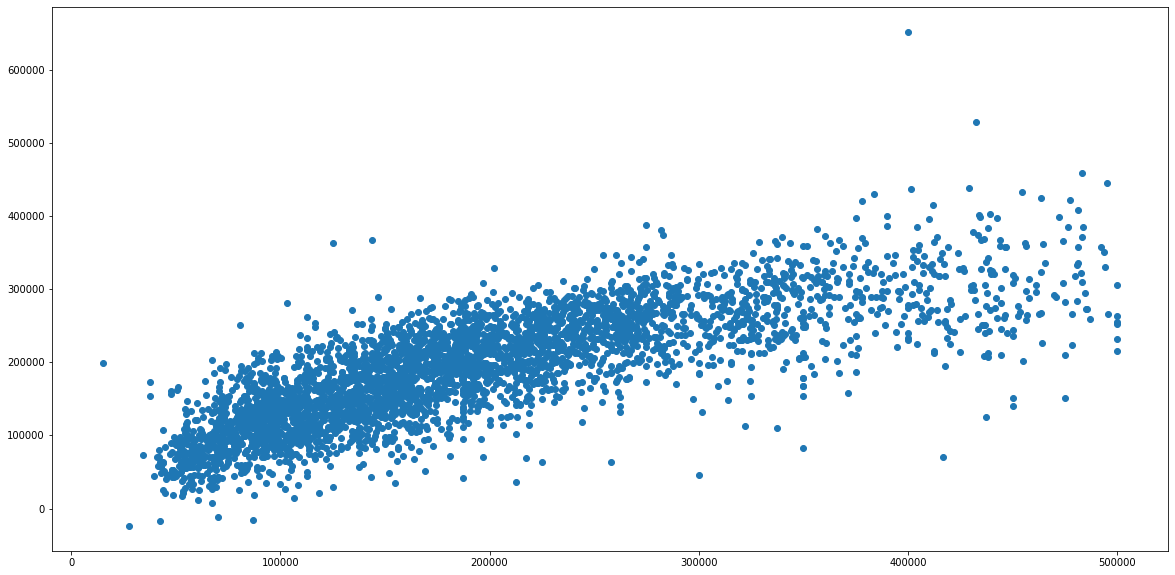

In [27]:
fig, ax = plt.subplots(figsize=(20, 10))

plt.scatter(y_test, y_pred)
plt.show()

In [24]:
# Choose some random 100 values and reset their index to 0
df_pred_actual_sample = df_pred_actual.sample(100)
df_pred_actual_sample = df_pred_actual_sample.reset_index()

df_pred_actual_sample.head()

,index,predicted,actual_price
0,9007,383370.122097,438500.0
1,11558,180564.860937,202400.0
2,17317,262320.262884,215200.0
3,15891,163885.435311,193800.0
4,18906,205483.857057,121900.0


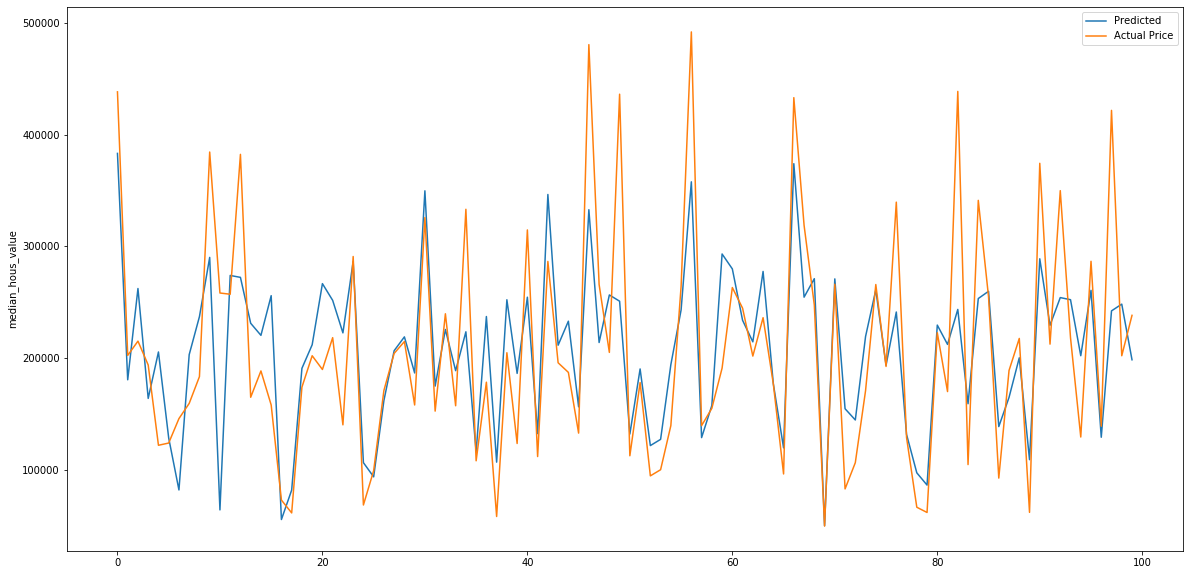

In [26]:
fig, ax = plt.subplots(figsize=(20, 10))

plt.plot(df_pred_actual_sample['predicted'], label='Predicted')
plt.plot(df_pred_actual_sample['actual_price'], label='Actual Price')

plt.ylabel('median_hous_value')

plt.legend()
plt.show()